In [209]:
import numpy as np
import yaml
import plotly.graph_objects as go

# New imports
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import argrelmin

# Peak detection
from peakutils import indexes
from scipy.signal import find_peaks as fp

# Variables
x_dim = 50
y_dim = 50


In [210]:
# Functions to use:

# 2dplot:
def linep2dp(x: np.ndarray, y: list | np.ndarray, yn="", title="", xaxis_title="x", yaxis_title="y") -> None:
    """Multi-line 2D plot using plotly.

    :param x: x-axis values.
    :param yv: y-axis values.
    :param yn: y-axis names.
    :param title: Title of the plot.
    :param xaxis_title: Title of the x-axis.
    :param yaxis_title: Title of the y-axis.
    """

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode="lines+markers", name=yn))
    fig.update_layout(title=title, xaxis_title=xaxis_title, yaxis_title=yaxis_title)
    fig.show()

# Filter peaks based on difference:
# From optimization dleta_tmp is optimal for value of 80 data point difference

def filter_peaks(peak_exceptions, delta_tmp):
	list_tmp = np.ndarray.tolist(peak_exceptions)
	j = 0
	while j < len(list_tmp)-1:
		if np.abs(list_tmp[j] - list_tmp[j+1]) < delta_tmp:
			list_tmp.pop(j+1)
		else: 
			j = j + 1
	return (np.array(list_tmp))


In [211]:
# Load data

# Without magnetic field
X = np.load("ESR_Continuous_2024-03-07-17-46-03_PCB_ref_50x50.npy")
X = np.sum(X[0] / X[1], axis=1)
with open("ESR_Continuous_2024-03-07-17-46-03_PCB_ref_50x50.yaml", "r") as f:
	cfg = yaml.safe_load(f)
	frq = cfg["frequency_values"]  # frequency values in Hz
print(f"X: {X.shape}")
print(f"frq: {len(frq)}")
x_data = [f * 1e-9 for f in frq]

# With magnetic field
X_mag = np.load("ESR_Continuous_2024-03-07-17-58-48_PCB_Top_25mA_50x50.npy")
X_mag = np.sum(X_mag[0] / X_mag[1], axis=1)
with open("ESR_Continuous_2024-03-07-17-58-48_PCB_Top_25mA_50x50.yaml", "r") as f_mag:
	cfg_mag = yaml.safe_load(f_mag)
	frq_mag = cfg_mag["frequency_values"]  # frequency values in Hz
print(f"X_mag: {X_mag.shape}")
print(f"frq: {len(frq_mag)}")
x_mag_data = [f_mag * 1e-9 for f_mag in frq_mag]


# for i in range(0,1):
# 	for j in range(0,1):
# 		y_data = X[:, i, j]	

X: (906, 50, 50)
frq: 906
X_mag: (906, 50, 50)
frq: 906


In [212]:
# # Run only once for optimization
# # Finding the proper prominence value and width for peak finder
# # with fixed prominence = 300 and polyorder = 6

# prominence_values = np.arange(0.0001, 0.01, 0.0005)
# width_values = np.arange(0.001, 0.3, 0.005)

# min_porminance = 1
# min_width = 1
# min_peak_nr_diff = 2500

# min_exceptions = []

# for prominence_tmp in prominence_values:
# 	for width_tmp in width_values:
		
# 		# print(prominence_tmp,", ", width_tmp,"\n")
  
# 		# Go over all data sets and find peaks
# 		x_data = [f * 1e-9 for f in frq]
 
# 		nr_diff_tmp = 0
# 		exceptions_tmp = []
 
# 		for i in range(0,x_dim):
# 			for j in range(0,y_dim):
# 				y_data = X[:, i, j]	
				
# 				# Savitzky-Golay filtering to separate different peak-clusters
# 				y_data_continuous = savgol_filter(y_data, window_length=300, polyorder=6, mode="nearest")

# 				# Invert y data
# 				y_data_continuous = -1*y_data_continuous

# 				# peaks = indexes(y_data_continuous, min_dist=min_distance,thres=threshold)
# 				peaks, properties = fp(y_data_continuous, prominence=prominence_tmp, width=width_tmp)

# 				if len(peaks) != 6:
# 					nr_diff_tmp = nr_diff_tmp + 1
# 					exceptions_tmp.append((i,j))
					

# 		if nr_diff_tmp < min_peak_nr_diff:
# 			min_peak_nr_diff = nr_diff_tmp
# 			min_porminance = prominence_tmp
# 			min_width = width_tmp
# 			min_exceptions = exceptions_tmp
   
# print("Min_prominance = ", min_porminance)
# print("Min_width = ", min_width)
# print("Exception = ", min_exceptions)

best_prominance =  0.0004\
best_width =  1e-5


In [213]:
# # Run only once for optimization
# # We know that:
# best_prominance =  0.0004
# best_width =  1e-5

# # Find proper window_length and poly order parameters for peak finding
# window_length_values = np.arange(260, 300, 1)
# polyorder_values = np.arange(1,10,1)


# min_peak_nr_diff = 2500
# best_widow_length = 0
# best_polyorder = 0

# min_exceptions = []

# for window_length_tmp in window_length_values:
# 	for polyorder_tmp in polyorder_values:
     
# 		print(window_length_tmp, polyorder_tmp)
		
#   		# Go over all data sets and find peaks
# 		x_data = [f * 1e-9 for f in frq]

# 		nr_diff_tmp = 0
# 		exceptions_tmp = []

# 		for i in range(0,x_dim):
# 			for j in range(0,y_dim):
# 				y_data = X[:, i, j]	
				
# 				# Savitzky-Golay filtering to separate different peak-clusters
# 				y_data_continuous = savgol_filter(y_data, window_length=window_length_tmp, polyorder=polyorder_tmp, mode="nearest")

# 				# Invert y data
# 				y_data_continuous = -1*y_data_continuous

# 				# peaks = indexes(y_data_continuous, min_dist=min_distance,thres=threshold)
# 				peaks, properties = fp(y_data_continuous, prominence=best_porminance, width=best_width)

# 				if len(peaks) != 6:
# 					nr_diff_tmp = nr_diff_tmp + 1
# 					exceptions_tmp.append((i,j))
					

# 		if nr_diff_tmp < min_peak_nr_diff:
# 			min_peak_nr_diff = nr_diff_tmp
# 			best_widow_length = window_length_tmp
# 			best_polyorder = polyorder_tmp
# 			min_exceptions = exceptions_tmp
	
# print("Best window length = ", best_widow_length)
# print("Best polyorder = ", best_polyorder)
# print(min_exceptions)

best_prominance =  0.0004 \
best_width =  1e-5 \
best_window_legth = 280 \
best_polyorder = 6 


Exception_list = [(2, 1), (2, 3), (2, 5), (2, 8), (2, 14), (2, 19), (2, 24), (2, 26), (2, 32), (2, 44), (3, 21), (4, 45), (9, 49), (21, 22), (25, 10), (43, 47), (45, 13), (45, 42), (47, 9)]

In [214]:
# # Testin exception values

# best_prominance =  0.0004
# best_width =  1e-5
# best_window_legth = 280
# best_polyorder = 6

# for i in range(0,x_dim):
# 	for j in range(0,y_dim):
# 		y_data = X[:, i, j]	
# 		# y_data = X_mag[:, i, j]	
  
# 		y_data_continuous = savgol_filter(y_data, window_length=best_window_legth, polyorder=best_polyorder, mode="nearest")
# 		y_data_continuous = -1*y_data_continuous
# 		peaks, properties = fp(y_data_continuous, prominence=best_prominance, width=best_width)
# 		y_data_continuous = -1*y_data_continuous
		
# 		if len(peaks) != 6:
# 			plt.figure()
# 			plt.plot(x_data, y_data,'b-', zorder = 0)
# 			plt.plot(x_data, y_data_continuous,'g-', zorder = 1)
# 			plt.scatter(np.array(x_data)[peaks.astype(int)], y_data_continuous[peaks[:]], color='red', zorder=2)
# 			print(peaks)
   

NOTE:\
We can observe a tendency of appearing a secondary peaks close to primary peaks. One improvement was to filter them based on minimum of 80 data-point distance between two peaks, this way we were able to eliminate the peak doubling.

One other observation (especially on the magnetic field) is that after these filtering we end up with 5 peaks, and the last one is not present.

For further improvement, when we apply the triple Lorentzian, we will just take the mean value of the last peak position and the length of the dataset in order to separate and apply on the the Lorentzian fit.

In [215]:
# Found values for good approximation and filterings
best_prominance =  0.0004
best_width =  1e-5
best_window_legth = 280
best_polyorder = 6
best_delta = 80

In [273]:
def find_peak_pos(x_data_tmp):

	# peak_positions = 
	peak_positions = np.zeros((x_dim,y_dim,6))
	# For exceptions
	peak_exceptions = [] # format: [i,j,(peaks)]

	for i in range(0,x_dim):
		for j in range(0,y_dim):
			y_data = X_mag[:, i, j]	
	
			# Savitzky-Golay filtering
			y_data_continuous = savgol_filter(y_data, window_length=best_window_legth, polyorder=best_polyorder, mode="nearest")
			# Peak finder from scipy
			y_data_continuous = -1*y_data_continuous
			peaks, properties = fp(y_data_continuous, prominence=best_prominance, width=best_width)
			y_data_continuous = -1*y_data_continuous
			# Peak filtering based on minimal distance
			peaks = filter_peaks(peaks, best_delta)
			# From obcservations, usually the last peak is missing:
			if len(peaks) == 5:
				peaks = np.array(np.ndarray.tolist(peaks) + [(int)(np.abs(len(x_data_tmp) + peaks[len(peaks)-1])/2)])
	
			if len(peaks)==6:
				peak_positions[i,j,:] = peaks
			else:			
				peak_exceptions.append((i,j,peaks))
				# For debug
				plt.figure()
				plt.plot(x_data_tmp, y_data,'b-', zorder = 0)
				plt.plot(x_data_tmp, y_data_continuous,'g-', zorder = 1)
				plt.scatter(np.array(x_data_tmp)[peaks.astype(int)], y_data_continuous[peaks[:]], color='red', zorder=2)
				print(peaks)		
    
	return (peak_positions, peak_exceptions)

rough_estimate_peak_positions,peak_exceptions = find_peak_pos(X)
rough_estimate_peak_positions_mag,peak_exceptions_mag = find_peak_pos(X_mag)


We have the peak positions for every plot, we can have a rough estimate for the peak differences:
\
Value1 = P1 - P6\
Value2 = P2 - P5\
Value3 = P3 - P4

In [274]:
def calc_B(peak_positions_tmp, x_data_tmp):
	B_tmp = np.zeros((x_dim, y_dim, 3))
	x_array = np.array(x_data_tmp)
	for i in range(x_dim):
		for j in range(y_dim):
			B_tmp[i][j][0] = np.abs(x_array[(int)(peak_positions_tmp[i][j][0])] - x_array[(int)(peak_positions_tmp[i][j][5])])
			B_tmp[i][j][1] = np.abs(x_array[(int)(peak_positions_tmp[i][j][1])] - x_array[(int)(peak_positions_tmp[i][j][4])])
			B_tmp[i][j][2] = np.abs(x_array[(int)(peak_positions_tmp[i][j][2])] - x_array[(int)(peak_positions_tmp[i][j][3])])
	return B_tmp

# Rough estimate, based only on current peak positions
B_rough_estimate = calc_B(rough_estimate_peak_positions, x_data)
B_rough_estimate_mag = calc_B(rough_estimate_peak_positions_mag, x_mag_data)

print("B_rough_estimate[0,0]:",B[0][0][:])
print("B_rough_estimate_mag[0,0]:",B_mag[0][0][:])

B_rough_estimate[0,0]: [0.16926667 0.12873333 0.05186667]
B_rough_estimate_mag[0,0]: [0.17593333 0.12473333 0.05093333]


IndexError: arrays used as indices must be of integer (or boolean) type

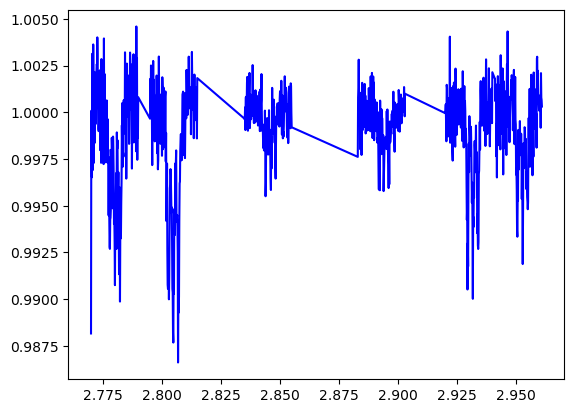

In [276]:

# def tripple_lorentzian( )


segments_data_point = np.zeros((x_dim, y_dim, 8))
# for i in range(0,x_dim):
# 	for j in range(0,y_dim):

for i in range(0,1):
	for j in range(0,1):

		y_data = X[:, i, j]
     
		# Calculating segments:
		for k in range(len(rough_estimate_peak_positions[i][j])):
			if k < (len(rough_estimate_peak_positions[i][j])-1) :
				segments_data_point[i][j][k+1] = (int)((rough_estimate_peak_positions[i][j][k]+rough_estimate_peak_positions[i][j][k+1])/2)
			elif k == (len(rough_estimate_peak_positions[0][0])-1):
				segments_data_point[i][j][k+1] = (int)((rough_estimate_peak_positions[i][j][k]+len(x_data))/2)
		# add last element:
		segments_data_point[i][j][7] = (int)(len(x_data))
  
		plt.figure()
		plt.plot(x_data, y_data, 'b-')
		plt.scatter(np.array(x_data)[segments_data_point[i][j][:-1]].astype(int), y_data[segments_data_point[i][j][:-1]], color='red', zorder=2)

		# Lorentzian fit for each segment
		for k in range(len(rough_peak_positions[i][j])):
			x0 = (int)(segments_data_point[i][j][k])
			x1 = (int)(segments_data_point[i][j][k+1])
   
			x_values = x_data[x0:x1]
			y_values = y_data[x0:x1]
   
			# print(x_values)
			# print(y_values)
   

# print(segments_data_point)